This data is taken from Kaggle - Funding Successful Projects on Kickstarter -  https://www.kaggle.com/codename007/funding-successful-projects.

It contains information about KickStarter projects and labels which succeeded to reach the goal or not.

### I start with data pre-processing and EDA and then save the data to disk in a pickle file so that next section can start from there.

### Go to Modeling section by pressing this [link](#Data-preparation-for-modeling)

### Go to results Comparison section by pressing this [link](#Comparison-of-classifiers-results)


## Exploratory Data Analysis

In [1]:
import pandas as pd

#### getting the data, then converting the dates format to something more tangible

In [2]:
raw_data = pd.read_csv('train.csv')#, encoding='1252',low_memory=False, parse_dates=True)
col_names = ['deadline', 'state_changed_at', 'created_at', 'launched_at']
for i in col_names:
    raw_data[i] = pd.to_datetime(raw_data[i], unit='s')
raw_data.head(3).T

,0,1,2
project_id,kkst1451568084,kkst1474482071,kkst183622197
name,drawing for dollars,Sponsor Dereck Blackburn (Lostwars) Artist in ...,Mr. Squiggles
desc,I like drawing pictures. and then i color them...,"I, Dereck Blackburn will be taking upon an inc...",So I saw darkpony's successfully funded drawin...
goal,20,300,30
keywords,drawing-for-dollars,sponsor-dereck-blackburn-lostwars-artist-in-re...,mr-squiggles
disable_communication,False,False,False
country,US,US,US
currency,USD,USD,USD
deadline,2009-05-03 06:59:59,2009-05-15 23:10:00,2009-05-22 21:26:00
state_changed_at,2009-05-03 07:00:17,2009-05-16 00:00:18,2009-05-22 21:30:18


#### summary of the data shows that:

 * there are only a few null data points
 * the converted columns appear as datetime data type

In [3]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108129 entries, 0 to 108128
Data columns (total 14 columns):
project_id               108129 non-null object
name                     108126 non-null object
desc                     108120 non-null object
goal                     108129 non-null float64
keywords                 108129 non-null object
disable_communication    108129 non-null bool
country                  108129 non-null object
currency                 108129 non-null object
deadline                 108129 non-null datetime64[ns]
state_changed_at         108129 non-null datetime64[ns]
created_at               108129 non-null datetime64[ns]
launched_at              108129 non-null datetime64[ns]
backers_count            108129 non-null int64
final_status             108129 non-null int64
dtypes: bool(1), datetime64[ns](4), float64(1), int64(2), object(6)
memory usage: 10.8+ MB


#### which columns have null data points?

In [4]:
raw_data.isna().sum()

project_id               0
name                     3
desc                     9
goal                     0
keywords                 0
disable_communication    0
country                  0
currency                 0
deadline                 0
state_changed_at         0
created_at               0
launched_at              0
backers_count            0
final_status             0
dtype: int64

#### present the rows with null values in the 'name' column and in the 'desc' column

In [5]:
null_name = raw_data[(raw_data['name'].isna())]
null_name.T

,13244,16386,32837
project_id,kkst881978749,kkst1149321271,kkst60101010
name,NaN,NaN,NaN
desc,NaN,NaN,...
goal,35000,200000,2000
keywords,you-have-the-power-to-put-our-film-in-theaters,bullied-to-triumph,unlamentia-straima-maybe-more
disable_communication,False,False,False
country,US,US,GB
currency,USD,USD,GBP
deadline,2011-12-05 04:59:00,2012-02-29 14:04:00,2013-01-06 22:00:00
state_changed_at,2011-12-05 04:59:02,2012-02-29 14:04:01,2013-01-06 22:00:32


### Delete rows with null 'name' and 'desc'

In [6]:
raw_data.drop(null_name.index, axis=0, inplace=True)

In [7]:
null_desc = raw_data[(raw_data['desc'].isna())]
null_desc.T

,19276,67393,67632,68852,75158,98721,104401
project_id,kkst716015319,kkst493162275,kkst2143840399,kkst810592516,kkst511508475,kkst580040638,kkst93676199
name,N/A (Canceled),OF Press - A WordPress Theme and Site Builder ...,Blue Heart - Natural Remedies (Canceled),Vending Machine (Canceled),TEST (Canceled),N/A (Canceled),None (Canceled)
desc,NaN,NaN,NaN,NaN,NaN,NaN,NaN
goal,50000,5000,1500,100,1e+06,100000,500
keywords,the-lineup-0,of-press,blue-heart-natural-remedies,online-sticker-book-vending-machine,caiman-connected-the-ultimate-mobile-device-ac...,international-festival-of-language-and-culture,2-songs-seduce-your-dreams-pop-and-latin-kizom...
disable_communication,False,False,False,False,False,False,False
country,US,US,US,US,US,US,US
currency,USD,USD,USD,USD,USD,USD,USD
deadline,2012-04-21 21:11:47,2014-08-10 21:45:23,2014-08-12 02:51:36,2014-08-18 04:00:00,2014-09-27 04:48:49,2015-04-01 15:19:00,2015-05-06 16:15:08
state_changed_at,2012-03-12 19:42:07,2014-07-30 22:58:09,2014-08-03 00:01:56,2014-08-18 03:52:00,2014-09-26 01:26:10,2015-02-20 16:21:07,2015-05-01 02:22:21


In [8]:
raw_data.drop(null_desc.index, axis=0, inplace=True)

### Just checking that the null lines were deleted

In [9]:
display(raw_data[(raw_data['name'].isna())])
raw_data[(raw_data['desc'].isna())]

,project_id,name,desc,goal,keywords,disable_communication,country,currency,deadline,state_changed_at,created_at,launched_at,backers_count,final_status


,project_id,name,desc,goal,keywords,disable_communication,country,currency,deadline,state_changed_at,created_at,launched_at,backers_count,final_status


In [10]:
raw_data.describe()

,goal,backers_count,final_status
count,1.081190e+05,108119.000000,108119.000000
mean,3.671673e+04,123.527817,0.319657
std,9.719431e+05,1176.799008,0.466346
min,1.000000e-02,0.000000,0.000000
25%,2.000000e+03,2.000000,0.000000
50%,5.000000e+03,17.000000,0.000000
75%,1.300000e+04,65.000000,1.000000
max,1.000000e+08,219382.000000,1.000000


In [11]:
raw_data.columns

Index(['project_id', 'name', 'desc', 'goal', 'keywords',
       'disable_communication', 'country', 'currency', 'deadline',
       'state_changed_at', 'created_at', 'launched_at', 'backers_count',
       'final_status'],
      dtype='object')

### What features should be used?

My analysis will rely on columns goal, country, currency, backers_count and I will drop the rest.

I will also add a column for duration - timedelta=deadline-launched_at.

In [12]:
data = raw_data[['goal', 'country', 'currency', 'backers_count',
                 'deadline', 'launched_at']]
data.head()

,goal,country,currency,backers_count,deadline,launched_at
0,20.0,US,USD,3,2009-05-03 06:59:59,2009-04-24 19:52:03
1,300.0,US,USD,2,2009-05-15 23:10:00,2009-04-29 03:26:32
2,30.0,US,USD,0,2009-05-22 21:26:00,2009-05-12 21:39:58
3,500.0,US,USD,18,2009-05-29 00:09:00,2009-04-29 00:58:50
4,2000.0,US,USD,1,2009-05-31 11:38:00,2009-05-01 12:22:21


In [13]:
tmp = data['deadline'] - data['launched_at']
data['duration'] = pd.to_timedelta(tmp, unit='D')
data.head()

C:\Users\giladb\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,goal,country,currency,backers_count,deadline,launched_at,duration
0,20.0,US,USD,3,2009-05-03 06:59:59,2009-04-24 19:52:03,8 days 11:07:56
1,300.0,US,USD,2,2009-05-15 23:10:00,2009-04-29 03:26:32,16 days 19:43:28
2,30.0,US,USD,0,2009-05-22 21:26:00,2009-05-12 21:39:58,9 days 23:46:02
3,500.0,US,USD,18,2009-05-29 00:09:00,2009-04-29 00:58:50,29 days 23:10:10
4,2000.0,US,USD,1,2009-05-31 11:38:00,2009-05-01 12:22:21,29 days 23:15:39


In [14]:
data.drop(columns=['deadline', 'launched_at'], axis=1, inplace=True)

C:\Users\giladb\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [15]:
data.head()

,goal,country,currency,backers_count,duration
0,20.0,US,USD,3,8 days 11:07:56
1,300.0,US,USD,2,16 days 19:43:28
2,30.0,US,USD,0,9 days 23:46:02
3,500.0,US,USD,18,29 days 23:10:10
4,2000.0,US,USD,1,29 days 23:15:39


In [16]:
data['duration [days]'] = data['duration'].dt.days

C:\Users\giladb\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [17]:
data.head()

,goal,country,currency,backers_count,duration,duration [days]
0,20.0,US,USD,3,8 days 11:07:56,8
1,300.0,US,USD,2,16 days 19:43:28,16
2,30.0,US,USD,0,9 days 23:46:02,9
3,500.0,US,USD,18,29 days 23:10:10,29
4,2000.0,US,USD,1,29 days 23:15:39,29


In [18]:
data.drop(axis=1, columns='duration', inplace=True)

C:\Users\giladb\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [19]:
data.head()

,goal,country,currency,backers_count,duration [days]
0,20.0,US,USD,3,8
1,300.0,US,USD,2,16
2,30.0,US,USD,0,9
3,500.0,US,USD,18,29
4,2000.0,US,USD,1,29


In [20]:
data_for_model = pd.concat([data, raw_data['final_status']], axis=1)

In [21]:
data_for_model.head()

,goal,country,currency,backers_count,duration [days],final_status
0,20.0,US,USD,3,8,1
1,300.0,US,USD,2,16,0
2,30.0,US,USD,0,9,0
3,500.0,US,USD,18,29,1
4,2000.0,US,USD,1,29,0


### Visualisations and EDA

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

C:\Users\giladb\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:1508: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


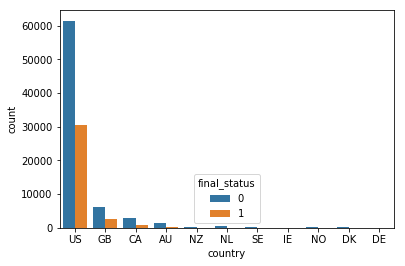

In [23]:
#fig, ax = plt.subplots(nrows=1,ncols=2)
sns.countplot(x='country', data=data_for_model, hue='final_status')

> By far, US kickstarters govern the data.

> However, the probability of 'winning' is low (~32%, see below), so my model has to do better than that.

In [24]:
probability_of_winning = (
    data_for_model[data_for_model['final_status']==1].count())/data_for_model['final_status'].count()
probability_of_winning

goal               0.319657
country            0.319657
currency           0.319657
backers_count      0.319657
duration [days]    0.319657
final_status       0.319657
dtype: float64

In [25]:
pd.DataFrame(data_for_model.groupby(['final_status','country'])['goal'].count())

goal
final_status country       
0            AU        1537
             CA        2899
             DE           1
             DK         152
             GB        6247
             IE          88
             NL         617
             NO          96
             NZ         275
             SE         195
             US       61451
1            AU         343
             CA         837
             DK          44
             GB        2510
             IE          23
             NL          88
             NO          18
             NZ          80
             SE          45
             US       30573

In [26]:
data_for_model.groupby('country').describe().T

country                          AU            CA      DE            DK  \
backers_count   count  1.880000e+03  3.736000e+03     1.0  1.960000e+02   
                mean   7.806862e+01  8.723635e+01     0.0  7.691327e+01   
                std    5.082901e+02  4.044585e+02     NaN  2.746750e+02   
                min    0.000000e+00  0.000000e+00     0.0  0.000000e+00   
                25%    1.000000e+00  1.000000e+00     0.0  1.000000e+00   
                50%    4.000000e+00  6.000000e+00     0.0  5.000000e+00   
                75%    2.600000e+01  4.100000e+01     0.0  4.000000e+01   
                max    1.525100e+04  9.498000e+03     0.0  2.749000e+03   
duration [days] count  1.880000e+03  3.736000e+03     1.0  1.960000e+02   
                mean   3.297819e+01  3.406611e+01    13.0  3.449490e+01   
                std    1.167103e+01  1.159255e+01     NaN  1.184970e+01   
                min    1.000000e+00  1.000000e+00    13.0  1.100000e+01   
                25%    3.000000e+01  3.000000e+01    13.0  2.900000e+01   
                50%    3.000000e+01  3.000000e+01    13.0  3.000000e+01   
                75%    3.300000e+01  3.600000e+01    13.0  3.900000e+01   
                max    6.000000e+01  6.000000e+01    13.0  6.000000e+01   
final_status    count  1.880000e+03  3.736000e+03     1.0  1.960000e+02   
                mean   1.824468e-01  2.240364e-01     0.0  2.244898e-01   
                std    3.863151e-01  4.170020e-01     NaN  4.183144e-01   
                min    0.000000e+00  0.000000e+00     0.0  0.000000e+00   
                25%    0.000000e+00  0.000000e+00     0.0  0.000000e+00   
                50%    0.000000e+00  0.000000e+00     0.0  0.000000e+00   
                75%    0.000000e+00  0.000000e+00     0.0  0.000000e+00   
                max    1.000000e+00  1.000000e+00     0.0  1.000000e+00   
goal            count  1.880000e+03  3.736000e+03     1.0  1.960000e+02   
                mean   1.058712e+05  6.426133e+04  3000.0  6.682399e+05   
                std    2.335256e+06  1.691676e+06     NaN  7.143968e+06   
                min    1.000000e+00  1.000000e+00  3000.0  1.000000e+02   
                25%    2.000000e+03  2.000000e+03  3000.0  1.000000e+04   
                50%    6.500000e+03  6.000000e+03  3000.0  3.000000e+04   
                75%    2.000000e+04  2.000000e+04  3000.0  1.000000e+05   
                max    1.000000e+08  1.000000e+08  3000.0  1.000000e+08   

country                          GB            IE            NL            NO  \
backers_count   count  8.757000e+03  1.110000e+02  7.050000e+02  1.140000e+02   
                mean   9.540196e+01  6.497297e+01  3.624397e+01  2.617544e+01   
                std    6.340618e+02  1.915867e+02  1.244187e+02  6.660520e+01   
                min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
                25%    2.000000e+00  5.000000e-01  0.000000e+00  1.000000e+00   
                50%    1.100000e+01  3.000000e+00  2.000000e+00  3.000000e+00   
                75%    5.000000e+01  2.100000e+01  1.600000e+01  1.375000e+01   
                max    3.538400e+04  1.407000e+03  1.445000e+03  4.340000e+02   
duration [days] count  8.757000e+03  1.110000e+02  7.050000e+02  1.140000e+02   
                mean   3.173393e+01  3.383784e+01  3.351206e+01  3.449123e+01   
                std    1.110612e+01  1.169657e+01  1.130568e+01  1.172943e+01   
                min    1.000000e+00  3.000000e+00  4.000000e+00  5.000000e+00   
                25%    2.900000e+01  3.000000e+01  3.000000e+01  3.000000e+01   
                50%    3.000000e+01  3.000000e+01  3.000000e+01  3.000000e+01   
                75%    3.100000e+01  3.600000e+01  3.500000e+01  3.500000e+01   
                max    6.000000e+01  6.000000e+01  7.100000e+01  6.000000e+01   
final_status    count  8.757000e+03  1.110000e+02  7.050000e+02  1.140000e+02   
                mean   2.866278e-01  2.072072e-01  1.248227e-01  1

C:\Users\giladb\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:1508: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


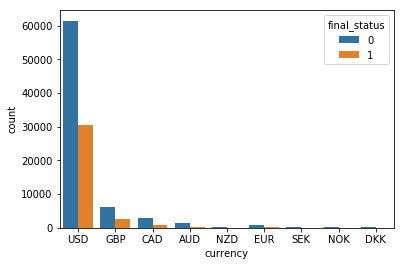

In [27]:
sns.countplot(x='currency', data=data_for_model, hue='final_status')

In [28]:
data_for_model.corr()

,goal,backers_count,duration [days],final_status
goal,1.000000,0.008734,0.018645,-0.018978
backers_count,0.008734,1.000000,-0.004398,0.116760
duration [days],0.018645,-0.004398,1.000000,-0.095012
final_status,-0.018978,0.116760,-0.095012,1.000000


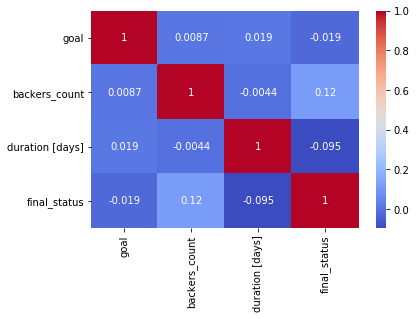

In [29]:
sns.heatmap(data_for_model.corr(),cmap='coolwarm',annot=True)

### I will save data_for_model DataFrame so I can later start over from this point and not from the beginning

In [30]:
data_for_model.to_pickle('data_for_model')

### Start modeling from this point

In [31]:
import pandas as pd
# read the file saved for modeling
data_for_model = pd.read_pickle('data_for_model')

In [32]:
data_for_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 108119 entries, 0 to 108128
Data columns (total 6 columns):
goal               108119 non-null float64
country            108119 non-null object
currency           108119 non-null object
backers_count      108119 non-null int64
duration [days]    108119 non-null int64
final_status       108119 non-null int64
dtypes: float64(1), int64(3), object(2)
memory usage: 5.8+ MB


In [33]:
data_for_model.head()

,goal,country,currency,backers_count,duration [days],final_status
0,20.0,US,USD,3,8,1
1,300.0,US,USD,2,16,0
2,30.0,US,USD,0,9,0
3,500.0,US,USD,18,29,1
4,2000.0,US,USD,1,29,0


### Data preparation for modeling

In [28]:
# load relevant packages
import pandas as pd
import numpy as np

In [29]:
data_for_model = pd.read_pickle('data_for_model')
# place data in a DataFrame
df_modeling = data_for_model.copy(deep=True)

In [30]:
# make data suitable for classification - categories rather than numbers
df_modeling_categorized = pd.get_dummies(df_modeling, columns=['country', 'currency'])

In [31]:
df_modeling_categorized.head()

,goal,backers_count,duration [days],final_status,country_AU,country_CA,country_DE,country_DK,country_GB,country_IE,country_NL,country_NO,country_NZ,country_SE,country_US,currency_AUD,currency_CAD,currency_DKK,currency_EUR,currency_GBP,currency_NOK,currency_NZD,currency_SEK,currency_USD
0,20.0,3,8,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
1,300.0,2,16,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
2,30.0,0,9,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
3,500.0,18,29,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
4,2000.0,1,29,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1


In [32]:
# place parameters into X and labels into y
X = df_modeling_categorized.drop('final_status', axis=1)
y = df_modeling_categorized['final_status']

In [33]:
# split data into train data and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.5)

### Before I start modeling with real classifiers, I will make a sanity check with a Dummy Estimator and compare estimators to it

In [40]:
from sklearn.dummy import DummyClassifier

In [41]:
# DummyClassifier(strategy=’stratified’, random_state=None, constant=None)
# “stratified”: generates predictions by respecting the training set’s class distribution
dummy_clf = DummyClassifier()
dummy_fit = dummy_clf.fit(X_train, y_train)
dummy_predict = dummy_clf.predict(X_test)

In [42]:
# assess the prediction of the model
from sklearn.metrics import classification_report,confusion_matrix, f1_score
print(confusion_matrix(y_test, dummy_predict))
print(classification_report(y_test, dummy_predict))

f1=[f1_score(y_test, dummy_predict, average=avg) for avg in ['micro', 'macro', 'weighted']]
print(f1)

[[25081 11780]
 [11670  5529]]
             precision    recall  f1-score   support

          0       0.68      0.68      0.68     36861
          1       0.32      0.32      0.32     17199

avg / total       0.57      0.57      0.57     54060

[0.56622271550129488, 0.50094262076614848, 0.56658998281005435]


> *a dummy estimator produces F1_score < 0.57 based on weighted average*

#### Save results to a comparison table

In [43]:
classifier_data=['Dummy_model', 'Dummy Classifier is not a real classifier',
                 f1_score(y_test, dummy_predict, average='weighted'), 
                 '“stratified” generates predictions by respecting the training set’s class distribution',
                 'useful as a simple baseline to compare with other (real) classifiers', 
                 confusion_matrix(y_test, dummy_predict), classification_report(y_test, dummy_predict)]
col_names=['name', 'description', 'F1_score', 'input_params', 'best_params',
         'confusion_matrix', 'classification report']
# classifier_comparison_dict = dict(zip(classifier_data, col_names))
classifier_comparison_df = pd.DataFrame(columns=col_names)
classifier_comparison_df.loc[len(classifier_comparison_df)] = classifier_data

classifier_comparison_df

,name,description,F1_score,input_params,best_params,confusion_matrix,classification report
0,Dummy_model,Dummy Classifier is not a real classifier,0.56659,“stratified” generates predictions by respecti...,useful as a simple baseline to compare with ot...,"[[25081, 11780], [11670, 5529]]",precision recall f1-score s...


#### Save the comparison table to file on disk for future use

In [44]:
classifier_comparison_df.to_pickle('classifier_comparison_table.pkl')

## I tried the following estimators

1. Logistic Regression - default parameters [link](#I-start-with-a-simple-model---Logistic-Regression---and-default-parameters)
2. Logistic Regression - grid search [link](#Grid-Search-on-Logistic-Regression)
3. Random Forest [link](#Model---Random-Forest)
4. Random Forest - grid search(es) [link](#Random-Forest---Grid-Search)
5. SGD [link](#Model---SGD-Classifier)
6. SGD grid search [link](#SGD-Grid-Search)
7. Gradient Boosting [link](#Model---Gradient-Boosting-Classifier)
8. Gradient Boosting grid search [link](#Grid-Search-on-Gradient-Boosting)
9. Voting - LogisticRegression, GaussianNB, RandomForest [link](#Let's-try-some-voting)
10. Voting with best performance classifiers -  [link](#)

### I start with a simple model - Logistic Regression - and default parameters

In [45]:
# craete a model by:
from sklearn.linear_model import LogisticRegression

# instantiating the Logistic Regression class
LR_model = LogisticRegression()

# put the model of the train data into the instatiated class
LR_model.fit(X_train, y_train)

# make a prediction of the test data
LR_predictions = LR_model.predict(X_test)
# visualise the prediction with a plot

# assess the prediction of the model
from sklearn.metrics import classification_report,confusion_matrix, f1_score
print('Confusion Matrix\n', confusion_matrix(y_test, LR_predictions))
print('Classification Report\n', classification_report(y_test, LR_predictions))
print('F1_score = {:.3f}'.format(f1_score(y_test, LR_predictions, average='weighted')))

Confusion Matrix
 [[34749  2112]
 [ 7080 10119]]
Classification Report
              precision    recall  f1-score   support

          0       0.83      0.94      0.88     36861
          1       0.83      0.59      0.69     17199

avg / total       0.83      0.83      0.82     54060

F1_score = 0.821


> Logistic Regression performs well, better at prediction of the 0 label, which is the majority, than the 1 label

#### Make a record in the comparison table, then to file

In [46]:
classifier_data=['LR_model', 'Logistic Regression default params', f1_score(y_test, LR_predictions, average='weighted'), 
      LR_model.get_params(), LR_model.get_params(), 
      confusion_matrix(y_test, LR_predictions), classification_report(y_test, LR_predictions)]
col_names=['name', 'description', 'F1_score', 'input_params', 'best_params',
         'confusion_matrix', 'classification report']
# classifier_comparison_dict = dict(zip(classifier_data, col_names))

classifier_comparison_df.loc[len(classifier_comparison_df)] = classifier_data
classifier_comparison_df

,name,description,F1_score,input_params,best_params,confusion_matrix,classification report
0,Dummy_model,Dummy Classifier is not a real classifier,0.566590,“stratified” generates predictions by respecti...,useful as a simple baseline to compare with ot...,"[[25081, 11780], [11670, 5529]]",precision recall f1-score s...
1,LR_model,Logistic Regression default params,0.820983,"{'C': 1.0, 'class_weight': None, 'dual': False...","{'C': 1.0, 'class_weight': None, 'dual': False...","[[34749, 2112], [7080, 10119]]",precision recall f1-score s...


#### save the data for future use

In [47]:
classifier_comparison_df.to_pickle('classifier_comparison_table.pkl')

#### Grid Search on Logistic Regression

In [48]:
from sklearn.model_selection import GridSearchCV

In [49]:
# LogisticRegression(penalty=’l2’, dual=False,
# tol=0.0001, C=1.0, fit_intercept=True,
# intercept_scaling=1, class_weight=None,
# random_state=None, solver=’liblinear’,
# max_iter=100, multi_class=’ovr’, verbose=0,
# warm_start=False, n_jobs=1)

LR_model_grid = LogisticRegression()

parameters = dict(C=[0.0001, 0.0005, 0.001, 0.1, 1.0],
                  fit_intercept=[True, False],
                  solver=['liblinear'],
                 class_weight=[None, 'balanced'])

# GridSearchCV(estimator, param_grid, scoring=None,
# fit_params=None, n_jobs=1, iid=True, refit=True,
# cv=None, verbose=0, pre_dispatch=‘2*n_jobs’,
# error_score=’raise’, return_train_score=’warn’)

LR_grid = GridSearchCV(LR_model_grid, param_grid=parameters, cv=7, verbose=3)

LR_grid.fit(X_train, y_train)

Fitting 7 folds for each of 20 candidates, totalling 140 fits
[CV] C=0.0001, class_weight=None, fit_intercept=True, solver=liblinear 
[CV]  C=0.0001, class_weight=None, fit_intercept=True, solver=liblinear, score=0.833117555670637, total=   0.1s
[CV] C=0.0001, class_weight=None, fit_intercept=True, solver=liblinear 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV]  C=0.0001, class_weight=None, fit_intercept=True, solver=liblinear, score=0.836613153806318, total=   0.2s
[CV] C=0.0001, class_weight=None, fit_intercept=True, solver=liblinear 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.5s remaining:    0.0s


[CV]  C=0.0001, class_weight=None, fit_intercept=True, solver=liblinear, score=0.8359445811213259, total=   0.2s
[CV] C=0.0001, class_weight=None, fit_intercept=True, solver=liblinear 
[CV]  C=0.0001, class_weight=None, fit_intercept=True, solver=liblinear, score=0.8311318311318311, total=   0.1s
[CV] C=0.0001, class_weight=None, fit_intercept=True, solver=liblinear 
[CV]  C=0.0001, class_weight=None, fit_intercept=True, solver=liblinear, score=0.8290598290598291, total=   0.3s
[CV] C=0.0001, class_weight=None, fit_intercept=True, solver=liblinear 
[CV]  C=0.0001, class_weight=None, fit_intercept=True, solver=liblinear, score=0.8295778295778296, total=   0.3s
[CV] C=0.0001, class_weight=None, fit_intercept=True, solver=liblinear 
[CV]  C=0.0001, class_weight=None, fit_intercept=True, solver=liblinear, score=0.8411033411033411, total=   0.2s
[CV] C=0.0001, class_weight=None, fit_intercept=False, solver=liblinear 
[CV]  C=0.0001, class_weight=None, fit_intercept=False, solver=liblinear, 

[CV]  C=0.0005, class_weight=balanced, fit_intercept=True, solver=liblinear, score=0.8613053613053613, total=   0.2s
[CV] C=0.0005, class_weight=balanced, fit_intercept=True, solver=liblinear 
[CV]  C=0.0005, class_weight=balanced, fit_intercept=True, solver=liblinear, score=0.8615643615643616, total=   0.2s
[CV] C=0.0005, class_weight=balanced, fit_intercept=True, solver=liblinear 
[CV]  C=0.0005, class_weight=balanced, fit_intercept=True, solver=liblinear, score=0.8611758611758612, total=   0.1s
[CV] C=0.0005, class_weight=balanced, fit_intercept=False, solver=liblinear 
[CV]  C=0.0005, class_weight=balanced, fit_intercept=False, solver=liblinear, score=0.8736406007250129, total=   0.1s
[CV] C=0.0005, class_weight=balanced, fit_intercept=False, solver=liblinear 
[CV]  C=0.0005, class_weight=balanced, fit_intercept=False, solver=liblinear, score=0.8682030036250648, total=   0.1s
[CV] C=0.0005, class_weight=balanced, fit_intercept=False, solver=liblinear 
[CV]  C=0.0005, class_weight=b

[CV]  C=0.1, class_weight=None, fit_intercept=True, solver=liblinear, score=0.8411033411033411, total=   0.2s
[CV] C=0.1, class_weight=None, fit_intercept=False, solver=liblinear .
[CV]  C=0.1, class_weight=None, fit_intercept=False, solver=liblinear, score=0.833117555670637, total=   0.1s
[CV] C=0.1, class_weight=None, fit_intercept=False, solver=liblinear .
[CV]  C=0.1, class_weight=None, fit_intercept=False, solver=liblinear, score=0.836613153806318, total=   0.1s
[CV] C=0.1, class_weight=None, fit_intercept=False, solver=liblinear .
[CV]  C=0.1, class_weight=None, fit_intercept=False, solver=liblinear, score=0.8359445811213259, total=   0.1s
[CV] C=0.1, class_weight=None, fit_intercept=False, solver=liblinear .
[CV]  C=0.1, class_weight=None, fit_intercept=False, solver=liblinear, score=0.8311318311318311, total=   0.1s
[CV] C=0.1, class_weight=None, fit_intercept=False, solver=liblinear .
[CV]  C=0.1, class_weight=None, fit_intercept=False, solver=liblinear, score=0.82918932918932

[CV]  C=1.0, class_weight=balanced, fit_intercept=False, solver=liblinear, score=0.8663731710475204, total=   0.1s
[CV] C=1.0, class_weight=balanced, fit_intercept=False, solver=liblinear 
[CV]  C=1.0, class_weight=balanced, fit_intercept=False, solver=liblinear, score=0.8642838642838643, total=   0.3s
[CV] C=1.0, class_weight=balanced, fit_intercept=False, solver=liblinear 
[CV]  C=1.0, class_weight=balanced, fit_intercept=False, solver=liblinear, score=0.8613053613053613, total=   0.3s
[CV] C=1.0, class_weight=balanced, fit_intercept=False, solver=liblinear 
[CV]  C=1.0, class_weight=balanced, fit_intercept=False, solver=liblinear, score=0.8615643615643616, total=   0.3s
[CV] C=1.0, class_weight=balanced, fit_intercept=False, solver=liblinear 
[CV]  C=1.0, class_weight=balanced, fit_intercept=False, solver=liblinear, score=0.8611758611758612, total=   0.2s


[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:   37.2s finished


GridSearchCV(cv=7, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.0001, 0.0005, 0.001, 0.1, 1.0], 'fit_intercept': [True, False], 'solver': ['liblinear'], 'class_weight': [None, 'balanced']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [50]:
from sklearn.metrics import classification_report,confusion_matrix

LR_predictions = LR_grid.predict(X_test)
LR_report = classification_report( y_test, LR_predictions )
LR_confusion = confusion_matrix(y_test, LR_predictions)
print(confusion_matrix(y_test, LR_predictions))
print(LR_report)

[[32139  4722]
 [ 2659 14540]]
             precision    recall  f1-score   support

          0       0.92      0.87      0.90     36861
          1       0.75      0.85      0.80     17199

avg / total       0.87      0.86      0.87     54060



In [51]:
LR_grid.best_params_

{'C': 0.0001,
 'class_weight': 'balanced',
 'fit_intercept': False,
 'solver': 'liblinear'}

In [52]:
LR_grid.best_estimator_

LogisticRegression(C=0.0001, class_weight='balanced', dual=False,
          fit_intercept=False, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [53]:
classifier_data=['Gridsearch LR_model', 'Logistic Regression Grid Search', 
                 f1_score(y_test, LR_predictions, average='weighted'),
                 LR_grid.get_params(), LR_grid.best_params_, 
                 LR_confusion, LR_report]

classifier_comparison_df.loc[len(classifier_comparison_df)] = classifier_data
classifier_comparison_df

,name,description,F1_score,input_params,best_params,confusion_matrix,classification report
0,Dummy_model,Dummy Classifier is not a real classifier,0.566590,“stratified” generates predictions by respecti...,useful as a simple baseline to compare with ot...,"[[25081, 11780], [11670, 5529]]",precision recall f1-score s...
1,LR_model,Logistic Regression default params,0.820983,"{'C': 1.0, 'class_weight': None, 'dual': False...","{'C': 1.0, 'class_weight': None, 'dual': False...","[[34749, 2112], [7080, 10119]]",precision recall f1-score s...
2,Gridsearch LR_model,Logistic Regression Grid Search,0.865364,"{'cv': 7, 'error_score': 'raise', 'estimator__...","{'C': 0.0001, 'class_weight': 'balanced', 'fit...","[[32139, 4722], [2659, 14540]]",precision recall f1-score s...


#### save the data for future use

In [54]:
classifier_comparison_df.to_pickle('classifier_comparison_table.pkl')

### Model - Random Forest

In [55]:
# from sklearn.cross_validation import train_test_split
# # split the data to Train and to Test
# X = df_rfc.drop(columns='...labels', axis=1)
# y = df_rfc['label']
# X_train, X_test, y_train, y_test = train_test_split(X,
#                                                     y,
#                                                     test_size= ,
#                                                     random_state=)

# bring in Decision Tree classifier
from sklearn.ensemble import RandomForestClassifier

# make an instance of the class
rfc = RandomForestClassifier()

# create a model from the data
rfc.fit(X_train, y_train)

# make a prediction on test data
rfc_predicitions = rfc.predict(X_test)

# assess model quality
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, rfc_predicitions))
print(classification_report(y_test, rfc_predicitions))

[[32898  3963]
 [ 4112 13087]]
             precision    recall  f1-score   support

          0       0.89      0.89      0.89     36861
          1       0.77      0.76      0.76     17199

avg / total       0.85      0.85      0.85     54060



In [56]:
classifier_data=['Random Forest classifier', 'Random Forest classifier',
                 f1_score(y_test, rfc_predicitions, average='weighted'),
                 rfc.get_params(), rfc.estimators_, 
                 confusion_matrix(y_test, rfc_predicitions),
                 classification_report(y_test, rfc_predicitions)]

classifier_comparison_df.loc[len(classifier_comparison_df)] = classifier_data
classifier_comparison_df

,name,description,F1_score,input_params,best_params,confusion_matrix,classification report
0,Dummy_model,Dummy Classifier is not a real classifier,0.566590,“stratified” generates predictions by respecti...,useful as a simple baseline to compare with ot...,"[[25081, 11780], [11670, 5529]]",precision recall f1-score s...
1,LR_model,Logistic Regression default params,0.820983,"{'C': 1.0, 'class_weight': None, 'dual': False...","{'C': 1.0, 'class_weight': None, 'dual': False...","[[34749, 2112], [7080, 10119]]",precision recall f1-score s...
2,Gridsearch LR_model,Logistic Regression Grid Search,0.865364,"{'cv': 7, 'error_score': 'raise', 'estimator__...","{'C': 0.0001, 'class_weight': 'balanced', 'fit...","[[32139, 4722], [2659, 14540]]",precision recall f1-score s...
3,Random Forest classifier,Random Forest classifier,0.850455,"{'bootstrap': True, 'class_weight': None, 'cri...","[DecisionTreeClassifier(class_weight=None, cri...","[[32898, 3963], [4112, 13087]]",precision recall f1-score s...


#### save the data for future use

In [57]:
classifier_comparison_df.to_pickle('classifier_comparison_table.pkl')

#### Random Forest - Grid Search

In [58]:
from sklearn.model_selection import GridSearchCV

In [59]:
# RandomForestClassifier(n_estimators=10, criterion=’gini’, max_depth=None,
# min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0,
# max_features=’auto’, max_leaf_nodes=None, min_impurity_decrease=0.0,
# min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=1,
# random_state=None, verbose=0, warm_start=False, class_weight=None)

RFC_model_grid = RandomForestClassifier()

parameters = dict(n_estimators=[5, 10, 50, 100, 200], criterion=['gini', 'entropy'])

# GridSearchCV(estimator, param_grid, scoring=None,
# fit_params=None, n_jobs=1, iid=True, refit=True,
# cv=None, verbose=0, pre_dispatch=‘2*n_jobs’,
# error_score=’raise’, return_train_score=’warn’)

RFC_grid = GridSearchCV(RFC_model_grid, param_grid=parameters, cv=5, verbose=3)#, scoring='f1')

RFC_grid.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] criterion=gini, n_estimators=5 ..................................
[CV]  criterion=gini, n_estimators=5, score=0.8493480070285767, total=   0.2s
[CV] criterion=gini, n_estimators=5 ..................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV]  criterion=gini, n_estimators=5, score=0.8576713215573847, total=   0.1s
[CV] criterion=gini, n_estimators=5 ..................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.5s remaining:    0.0s


[CV]  criterion=gini, n_estimators=5, score=0.8436777356396263, total=   0.3s
[CV] criterion=gini, n_estimators=5 ..................................
[CV]  criterion=gini, n_estimators=5, score=0.8454352048839145, total=   0.2s
[CV] criterion=gini, n_estimators=5 ..................................
[CV]  criterion=gini, n_estimators=5, score=0.8446027194524096, total=   0.2s
[CV] criterion=gini, n_estimators=10 .................................
[CV]  criterion=gini, n_estimators=10, score=0.8522149264773883, total=   0.6s
[CV] criterion=gini, n_estimators=10 .................................
[CV]  criterion=gini, n_estimators=10, score=0.8572089151946731, total=   0.5s
[CV] criterion=gini, n_estimators=10 .................................
[CV]  criterion=gini, n_estimators=10, score=0.849227638516326, total=   0.5s
[CV] criterion=gini, n_estimators=10 .................................
[CV]  criterion=gini, n_estimators=10, score=0.848117657940986, total=   0.5s
[CV] criterion=gini, n_est

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  2.9min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [5, 10, 50, 100, 200], 'criterion': ['gini', 'entropy']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [60]:
from sklearn.metrics import classification_report,confusion_matrix

RFC_predictions = RFC_grid.predict(X_test)
RFC_report = classification_report( y_test, RFC_predictions )
RFC_confusion = confusion_matrix(y_test, RFC_predictions)
print(RFC_confusion)
print(RFC_report)

[[32726  4135]
 [ 3622 13577]]
             precision    recall  f1-score   support

          0       0.90      0.89      0.89     36861
          1       0.77      0.79      0.78     17199

avg / total       0.86      0.86      0.86     54060



In [61]:
RFC_grid.best_params_

{'criterion': 'gini', 'n_estimators': 200}

In [62]:
RFC_grid.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [63]:
classifier_data=['GridSearch Random Forest classifier', 'GridSearch Random Forest classifier',
                 f1_score(y_test, RFC_predictions, average='weighted'),
                 RFC_grid.get_params(), RFC_grid.best_params_, 
                 RFC_confusion, RFC_report]

classifier_comparison_df.loc[len(classifier_comparison_df)] = classifier_data
classifier_comparison_df

,name,description,F1_score,input_params,best_params,confusion_matrix,classification report
0,Dummy_model,Dummy Classifier is not a real classifier,0.566590,“stratified” generates predictions by respecti...,useful as a simple baseline to compare with ot...,"[[25081, 11780], [11670, 5529]]",precision recall f1-score s...
1,LR_model,Logistic Regression default params,0.820983,"{'C': 1.0, 'class_weight': None, 'dual': False...","{'C': 1.0, 'class_weight': None, 'dual': False...","[[34749, 2112], [7080, 10119]]",precision recall f1-score s...
2,Gridsearch LR_model,Logistic Regression Grid Search,0.865364,"{'cv': 7, 'error_score': 'raise', 'estimator__...","{'C': 0.0001, 'class_weight': 'balanced', 'fit...","[[32139, 4722], [2659, 14540]]",precision recall f1-score s...
3,Random Forest classifier,Random Forest classifier,0.850455,"{'bootstrap': True, 'class_weight': None, 'cri...","[DecisionTreeClassifier(class_weight=None, cri...","[[32898, 3963], [4112, 13087]]",precision recall f1-score s...
4,GridSearch Random Forest classifier,GridSearch Random Forest classifier,0.857063,"{'cv': 5, 'error_score': 'raise', 'estimator__...","{'criterion': 'gini', 'n_estimators': 200}","[[32726, 4135], [3622, 13577]]",precision recall f1-score s...


#### save the data for future use

In [64]:
classifier_comparison_df.to_pickle('classifier_comparison_table.pkl')

#### continue grid searching with more n_estimators

In [65]:
parameters = dict(n_estimators=[1000, 1500, 2000], criterion=['gini', 'entropy'])

RFC_grid = GridSearchCV(RFC_model_grid, param_grid=parameters, cv=5, verbose=3)#, scoring='f1')

RFC_grid.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] criterion=gini, n_estimators=1000 ...............................
[CV]  criterion=gini, n_estimators=1000, score=0.8546194395634884, total=  35.2s
[CV] criterion=gini, n_estimators=1000 ...............................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   44.3s remaining:    0.0s


[CV]  criterion=gini, n_estimators=1000, score=0.8627577915472117, total=  35.5s
[CV] criterion=gini, n_estimators=1000 ...............................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  1.5min remaining:    0.0s


[CV]  criterion=gini, n_estimators=1000, score=0.859402460456942, total=  34.7s
[CV] criterion=gini, n_estimators=1000 ...............................
[CV]  criterion=gini, n_estimators=1000, score=0.8535750624364074, total=  34.0s
[CV] criterion=gini, n_estimators=1000 ...............................
[CV]  criterion=gini, n_estimators=1000, score=0.8511701045231709, total=  36.1s
[CV] criterion=gini, n_estimators=1500 ...............................
[CV]  criterion=gini, n_estimators=1500, score=0.8534171830204383, total= 1.2min
[CV] criterion=gini, n_estimators=1500 ...............................
[CV]  criterion=gini, n_estimators=1500, score=0.8633126791824656, total=  54.7s
[CV] criterion=gini, n_estimators=1500 ...............................
[CV]  criterion=gini, n_estimators=1500, score=0.8590324669318287, total=  53.4s
[CV] criterion=gini, n_estimators=1500 ...............................
[CV]  criterion=gini, n_estimators=1500, score=0.8526500786236241, total=  52.1s
[CV] cri

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed: 35.7min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [1000, 1500, 2000], 'criterion': ['gini', 'entropy']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [66]:
RFC_grid.best_params_

{'criterion': 'gini', 'n_estimators': 1000}

In [67]:
RFC_grid.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [68]:
from sklearn.metrics import classification_report,confusion_matrix

RFC_predictions2 = RFC_grid.predict(X_test)
RFC_report2 = classification_report(y_test, RFC_predictions2)
RFC_confusion2 = confusion_matrix(y_test, RFC_predictions2)
print(RFC_confusion2)
print(RFC_report2)

[[32732  4129]
 [ 3572 13627]]
             precision    recall  f1-score   support

          0       0.90      0.89      0.89     36861
          1       0.77      0.79      0.78     17199

avg / total       0.86      0.86      0.86     54060



In [69]:
classifier_data=['GridSearch Random Forest classifier 2', 'GridSearch Random Forest classifier 2',
                 f1_score(y_test, RFC_predictions2, average='weighted'),
                 RFC_grid.get_params(), RFC_grid.best_params_, 
                 RFC_confusion2, RFC_report2]

classifier_comparison_df.loc[len(classifier_comparison_df)] = classifier_data
classifier_comparison_df

,name,description,F1_score,input_params,best_params,confusion_matrix,classification report
0,Dummy_model,Dummy Classifier is not a real classifier,0.566590,“stratified” generates predictions by respecti...,useful as a simple baseline to compare with ot...,"[[25081, 11780], [11670, 5529]]",precision recall f1-score s...
1,LR_model,Logistic Regression default params,0.820983,"{'C': 1.0, 'class_weight': None, 'dual': False...","{'C': 1.0, 'class_weight': None, 'dual': False...","[[34749, 2112], [7080, 10119]]",precision recall f1-score s...
2,Gridsearch LR_model,Logistic Regression Grid Search,0.865364,"{'cv': 7, 'error_score': 'raise', 'estimator__...","{'C': 0.0001, 'class_weight': 'balanced', 'fit...","[[32139, 4722], [2659, 14540]]",precision recall f1-score s...
3,Random Forest classifier,Random Forest classifier,0.850455,"{'bootstrap': True, 'class_weight': None, 'cri...","[DecisionTreeClassifier(class_weight=None, cri...","[[32898, 3963], [4112, 13087]]",precision recall f1-score s...
4,GridSearch Random Forest classifier,GridSearch Random Forest classifier,0.857063,"{'cv': 5, 'error_score': 'raise', 'estimator__...","{'criterion': 'gini', 'n_estimators': 200}","[[32726, 4135], [3622, 13577]]",precision recall f1-score s...
5,GridSearch Random Forest classifier 2,GridSearch Random Forest classifier 2,0.858140,"{'cv': 5, 'error_score': 'raise', 'estimator__...","{'criterion': 'gini', 'n_estimators': 1000}","[[32732, 4129], [3572, 13627]]",precision recall f1-score s...


#### save the data for future use

In [70]:
classifier_comparison_df.to_pickle('classifier_comparison_table.pkl')

### Model - SGD Classifier

In [71]:
# bring in SGD Classifier
from sklearn.linear_model import SGDClassifier

# make an instance of the class
sgdc = SGDClassifier()

# create a model from the data
sgdc.fit(X_train, y_train)

# make a prediction on test data
sgdc_predicitions = sgdc.predict(X_test)

# assess model quality
from sklearn.metrics import classification_report, confusion_matrix, f1_score
print(confusion_matrix(y_test, sgdc_predicitions))
print(classification_report(y_test, sgdc_predicitions))

C:\Users\giladb\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


[[36861     0]
 [17174    25]]
             precision    recall  f1-score   support

          0       0.68      1.00      0.81     36861
          1       1.00      0.00      0.00     17199

avg / total       0.78      0.68      0.55     54060



In [72]:
sgdc_default_params = sgdc.get_params()
sgdc_default_params

{'alpha': 0.0001,
 'average': False,
 'class_weight': None,
 'epsilon': 0.1,
 'eta0': 0.0,
 'fit_intercept': True,
 'l1_ratio': 0.15,
 'learning_rate': 'optimal',
 'loss': 'hinge',
 'max_iter': None,
 'n_iter': None,
 'n_jobs': 1,
 'penalty': 'l2',
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'tol': None,
 'verbose': 0,
 'warm_start': False}

In [73]:
classifier_data=['SGD classifier', 'Stochastic Gradient Descent classifier', 
                 f1_score(y_test, sgdc_predicitions, average='weighted'),
                 sgdc.get_params(), sgdc.get_params(), 
                 confusion_matrix(y_test, sgdc_predicitions),
                 classification_report(y_test, sgdc_predicitions)]

classifier_comparison_df.loc[len(classifier_comparison_df)] = classifier_data
classifier_comparison_df

,name,description,F1_score,input_params,best_params,confusion_matrix,classification report
0,Dummy_model,Dummy Classifier is not a real classifier,0.566590,“stratified” generates predictions by respecti...,useful as a simple baseline to compare with ot...,"[[25081, 11780], [11670, 5529]]",precision recall f1-score s...
1,LR_model,Logistic Regression default params,0.820983,"{'C': 1.0, 'class_weight': None, 'dual': False...","{'C': 1.0, 'class_weight': None, 'dual': False...","[[34749, 2112], [7080, 10119]]",precision recall f1-score s...
2,Gridsearch LR_model,Logistic Regression Grid Search,0.865364,"{'cv': 7, 'error_score': 'raise', 'estimator__...","{'C': 0.0001, 'class_weight': 'balanced', 'fit...","[[32139, 4722], [2659, 14540]]",precision recall f1-score s...
3,Random Forest classifier,Random Forest classifier,0.850455,"{'bootstrap': True, 'class_weight': None, 'cri...","[DecisionTreeClassifier(class_weight=None, cri...","[[32898, 3963], [4112, 13087]]",precision recall f1-score s...
4,GridSearch Random Forest classifier,GridSearch Random Forest classifier,0.857063,"{'cv': 5, 'error_score': 'raise', 'estimator__...","{'criterion': 'gini', 'n_estimators': 200}","[[32726, 4135], [3622, 13577]]",precision recall f1-score s...
5,GridSearch Random Forest classifier 2,GridSearch Random Forest classifier 2,0.858140,"{'cv': 5, 'error_score': 'raise', 'estimator__...","{'criterion': 'gini', 'n_estimators': 1000}","[[32732, 4129], [3572, 13627]]",precision recall f1-score s...
6,SGD classifier,Stochastic Gradient Descent classifier,0.553947,"{'alpha': 0.0001, 'average': False, 'class_wei...","{'alpha': 0.0001, 'average': False, 'class_wei...","[[36861, 0], [17174, 25]]",precision recall f1-score s...


#### save the data for future use

In [74]:
classifier_comparison_df.to_pickle('classifier_comparison_table.pkl')

### Model - Gradient Boosting Classifier

In [75]:
# bring in Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier

# GradientBoostingClassifier(loss=’deviance’, learning_rate=0.1, n_estimators=100,
# subsample=1.0, criterion=’friedman_mse’, min_samples_split=2, min_samples_leaf=1,
# min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0,
# min_impurity_split=None, init=None, random_state=None, max_features=None,
# verbose=0, max_leaf_nodes=None, warm_start=False, presort=’auto’)

# make an instance of the class
GBC = GradientBoostingClassifier()

# create a model from the data
GBC.fit(X_train, y_train)

# make a prediction on test data
GBC_predicitions = GBC.predict(X_test)

# assess model quality
from sklearn.metrics import classification_report, confusion_matrix, f1_score
GBC_confusion = confusion_matrix(y_test, GBC_predicitions)
GBC_report = classification_report(y_test, GBC_predicitions)
f1 = f1_score(y_test, GBC_predicitions, average='weighted')
print(GBC_confusion)
print(GBC_report)
print(f1)

[[32882  3979]
 [ 2634 14565]]
             precision    recall  f1-score   support

          0       0.93      0.89      0.91     36861
          1       0.79      0.85      0.81     17199

avg / total       0.88      0.88      0.88     54060

0.878837906636


In [76]:
classifier_data=['GBC classifier',
                 'Gradient Boosting classifier default parameters',
                 f1,
                 GBC.get_params(),
                 GBC.get_params(), 
                 GBC_confusion, 
                 GBC_report]

classifier_comparison_df.loc[len(classifier_comparison_df)] = classifier_data
classifier_comparison_df

,name,description,F1_score,input_params,best_params,confusion_matrix,classification report
0,Dummy_model,Dummy Classifier is not a real classifier,0.566590,“stratified” generates predictions by respecti...,useful as a simple baseline to compare with ot...,"[[25081, 11780], [11670, 5529]]",precision recall f1-score s...
1,LR_model,Logistic Regression default params,0.820983,"{'C': 1.0, 'class_weight': None, 'dual': False...","{'C': 1.0, 'class_weight': None, 'dual': False...","[[34749, 2112], [7080, 10119]]",precision recall f1-score s...
2,Gridsearch LR_model,Logistic Regression Grid Search,0.865364,"{'cv': 7, 'error_score': 'raise', 'estimator__...","{'C': 0.0001, 'class_weight': 'balanced', 'fit...","[[32139, 4722], [2659, 14540]]",precision recall f1-score s...
3,Random Forest classifier,Random Forest classifier,0.850455,"{'bootstrap': True, 'class_weight': None, 'cri...","[DecisionTreeClassifier(class_weight=None, cri...","[[32898, 3963], [4112, 13087]]",precision recall f1-score s...
4,GridSearch Random Forest classifier,GridSearch Random Forest classifier,0.857063,"{'cv': 5, 'error_score': 'raise', 'estimator__...","{'criterion': 'gini', 'n_estimators': 200}","[[32726, 4135], [3622, 13577]]",precision recall f1-score s...
5,GridSearch Random Forest classifier 2,GridSearch Random Forest classifier 2,0.858140,"{'cv': 5, 'error_score': 'raise', 'estimator__...","{'criterion': 'gini', 'n_estimators': 1000}","[[32732, 4129], [3572, 13627]]",precision recall f1-score s...
6,SGD classifier,Stochastic Gradient Descent classifier,0.553947,"{'alpha': 0.0001, 'average': False, 'class_wei...","{'alpha': 0.0001, 'average': False, 'class_wei...","[[36861, 0], [17174, 25]]",precision recall f1-score s...
7,GBC classifier,Gradient Boosting classifier default parameters,0.878838,"{'criterion': 'friedman_mse', 'init': None, 'l...","{'criterion': 'friedman_mse', 'init': None, 'l...","[[32882, 3979], [2634, 14565]]",precision recall f1-score s...


#### save the data for future use

In [77]:
classifier_comparison_df.to_pickle('classifier_comparison_table.pkl')

### Grid Search on Gradient Boosting

In [78]:
from sklearn.model_selection import GridSearchCV

In [79]:
# GradientBoostingClassifier(loss=’deviance’, learning_rate=0.1, n_estimators=100,
# subsample=1.0, criterion=’friedman_mse’, min_samples_split=2, min_samples_leaf=1,
# min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0,
# min_impurity_split=None, init=None, random_state=None, max_features=None,
# verbose=0, max_leaf_nodes=None, warm_start=False, presort=’auto’)

GBC_model_grid = GradientBoostingClassifier()

parameters = dict(loss=['deviance', 'exponential'],
                  learning_rate=[0.01, 0.1, 1, 2],
                  n_estimators=[50, 100, 200, 500])

# GridSearchCV(estimator, param_grid, scoring=None,
# fit_params=None, n_jobs=1, iid=True, refit=True,
# cv=None, verbose=0, pre_dispatch=‘2*n_jobs’,
# error_score=’raise’, return_train_score=’warn’)

GBC_grid = GridSearchCV(GBC_model_grid, param_grid=parameters, cv=5, verbose=3)#, scoring='f1')

GBC_grid.fit(X_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] learning_rate=0.01, loss=deviance, n_estimators=50 ..............
[CV]  learning_rate=0.01, loss=deviance, n_estimators=50, score=0.7339313788957736, total=   2.3s
[CV] learning_rate=0.01, loss=deviance, n_estimators=50 ..............


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.3s remaining:    0.0s


[CV]  learning_rate=0.01, loss=deviance, n_estimators=50, score=0.7444742439655969, total=   2.3s
[CV] learning_rate=0.01, loss=deviance, n_estimators=50 ..............


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    4.8s remaining:    0.0s


[CV]  learning_rate=0.01, loss=deviance, n_estimators=50, score=0.7414670243270742, total=   2.2s
[CV] learning_rate=0.01, loss=deviance, n_estimators=50 ..............
[CV]  learning_rate=0.01, loss=deviance, n_estimators=50, score=0.7400795486078994, total=   2.5s
[CV] learning_rate=0.01, loss=deviance, n_estimators=50 ..............
[CV]  learning_rate=0.01, loss=deviance, n_estimators=50, score=0.7398945518453427, total=   3.1s
[CV] learning_rate=0.01, loss=deviance, n_estimators=100 .............
[CV]  learning_rate=0.01, loss=deviance, n_estimators=100, score=0.8604457597336539, total=   5.3s
[CV] learning_rate=0.01, loss=deviance, n_estimators=100 .............
[CV]  learning_rate=0.01, loss=deviance, n_estimators=100, score=0.8720059188014427, total=   4.4s
[CV] learning_rate=0.01, loss=deviance, n_estimators=100 .............
[CV]  learning_rate=0.01, loss=deviance, n_estimators=100, score=0.864767366571085, total=   5.1s
[CV] learning_rate=0.01, loss=deviance, n_estimators=10

[CV]  learning_rate=0.1, loss=deviance, n_estimators=200, score=0.8826412651438084, total=   6.6s
[CV] learning_rate=0.1, loss=deviance, n_estimators=200 ..............
[CV]  learning_rate=0.1, loss=deviance, n_estimators=200, score=0.874942188511701, total=   6.7s
[CV] learning_rate=0.1, loss=deviance, n_estimators=200 ..............
[CV]  learning_rate=0.1, loss=deviance, n_estimators=200, score=0.8741097030801961, total=   6.5s
[CV] learning_rate=0.1, loss=deviance, n_estimators=200 ..............
[CV]  learning_rate=0.1, loss=deviance, n_estimators=200, score=0.8727222273610212, total=   6.7s
[CV] learning_rate=0.1, loss=deviance, n_estimators=500 ..............
[CV]  learning_rate=0.1, loss=deviance, n_estimators=500, score=0.873300656617035, total=  15.0s
[CV] learning_rate=0.1, loss=deviance, n_estimators=500 ..............
[CV]  learning_rate=0.1, loss=deviance, n_estimators=500, score=0.881623971145843, total=  16.2s
[CV] learning_rate=0.1, loss=deviance, n_estimators=500 ....

[CV]  learning_rate=1, loss=exponential, n_estimators=50, score=0.8721908813465273, total=   1.7s
[CV] learning_rate=1, loss=exponential, n_estimators=50 ..............
[CV]  learning_rate=1, loss=exponential, n_estimators=50, score=0.8786645704244891, total=   1.7s
[CV] learning_rate=1, loss=exponential, n_estimators=50 ..............
[CV]  learning_rate=1, loss=exponential, n_estimators=50, score=0.8722597354546295, total=   1.6s
[CV] learning_rate=1, loss=exponential, n_estimators=50 ..............
[CV]  learning_rate=1, loss=exponential, n_estimators=50, score=0.8707797613541763, total=   1.7s
[CV] learning_rate=1, loss=exponential, n_estimators=50 ..............
[CV]  learning_rate=1, loss=exponential, n_estimators=50, score=0.871797243548238, total=   1.7s
[CV] learning_rate=1, loss=exponential, n_estimators=100 .............
[CV]  learning_rate=1, loss=exponential, n_estimators=100, score=0.8683991491722927, total=   3.2s
[CV] learning_rate=1, loss=exponential, n_estimators=100 

[CV]  learning_rate=2, loss=exponential, n_estimators=100, score=0.858847470169272, total=   3.7s
[CV] learning_rate=2, loss=exponential, n_estimators=200 .............
[CV]  learning_rate=2, loss=exponential, n_estimators=200, score=0.8630352353648386, total=   8.1s
[CV] learning_rate=2, loss=exponential, n_estimators=200 .............
[CV]  learning_rate=2, loss=exponential, n_estimators=200, score=0.8692314806251734, total=   7.4s
[CV] learning_rate=2, loss=exponential, n_estimators=200 .............
[CV]  learning_rate=2, loss=exponential, n_estimators=200, score=0.8587549717879938, total=   7.4s
[CV] learning_rate=2, loss=exponential, n_estimators=200 .............
[CV]  learning_rate=2, loss=exponential, n_estimators=200, score=0.8600499491258903, total=   8.5s
[CV] learning_rate=2, loss=exponential, n_estimators=200 .............
[CV]  learning_rate=2, loss=exponential, n_estimators=200, score=0.8604199426510036, total=   8.6s
[CV] learning_rate=2, loss=exponential, n_estimators

[Parallel(n_jobs=1)]: Done 160 out of 160 | elapsed: 22.5min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'loss': ['deviance', 'exponential'], 'learning_rate': [0.01, 0.1, 1, 2], 'n_estimators': [50, 100, 200, 500]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [80]:
from sklearn.metrics import classification_report,confusion_matrix, f1_score

GBC_grid_predictions= GBC_grid.predict(X_test)
GBC_grid_report = classification_report(y_test, GBC_grid_predictions)
GBC_grid_confusion = confusion_matrix(y_test, GBC_grid_predictions)
f1_grid = f1_score(y_test, GBC_grid_predictions, average='weighted')
print('Confusion Matrix\n', GBC_confusion)
print('Classification Report\n', GBC_report)
print('F1 score\n', f1)

Confusion Matrix
 [[32882  3979]
 [ 2634 14565]]
Classification Report
              precision    recall  f1-score   support

          0       0.93      0.89      0.91     36861
          1       0.79      0.85      0.81     17199

avg / total       0.88      0.88      0.88     54060

F1 score
 0.878837906636


In [81]:
GBC_grid.best_params_

{'learning_rate': 0.1, 'loss': 'deviance', 'n_estimators': 100}

In [82]:
classifier_data=['GBC classifier grid search',
                 'Gradient Boosting classifier Grid Search',
                 f1_grid,
                 GBC_grid.get_params(),
                 GBC_grid.best_params_, 
                 GBC_confusion, 
                 GBC_report]

classifier_comparison_df.loc[len(classifier_comparison_df)] = classifier_data
classifier_comparison_df

,name,description,F1_score,input_params,best_params,confusion_matrix,classification report
0,Dummy_model,Dummy Classifier is not a real classifier,0.566590,“stratified” generates predictions by respecti...,useful as a simple baseline to compare with ot...,"[[25081, 11780], [11670, 5529]]",precision recall f1-score s...
1,LR_model,Logistic Regression default params,0.820983,"{'C': 1.0, 'class_weight': None, 'dual': False...","{'C': 1.0, 'class_weight': None, 'dual': False...","[[34749, 2112], [7080, 10119]]",precision recall f1-score s...
2,Gridsearch LR_model,Logistic Regression Grid Search,0.865364,"{'cv': 7, 'error_score': 'raise', 'estimator__...","{'C': 0.0001, 'class_weight': 'balanced', 'fit...","[[32139, 4722], [2659, 14540]]",precision recall f1-score s...
3,Random Forest classifier,Random Forest classifier,0.850455,"{'bootstrap': True, 'class_weight': None, 'cri...","[DecisionTreeClassifier(class_weight=None, cri...","[[32898, 3963], [4112, 13087]]",precision recall f1-score s...
4,GridSearch Random Forest classifier,GridSearch Random Forest classifier,0.857063,"{'cv': 5, 'error_score': 'raise', 'estimator__...","{'criterion': 'gini', 'n_estimators': 200}","[[32726, 4135], [3622, 13577]]",precision recall f1-score s...
5,GridSearch Random Forest classifier 2,GridSearch Random Forest classifier 2,0.858140,"{'cv': 5, 'error_score': 'raise', 'estimator__...","{'criterion': 'gini', 'n_estimators': 1000}","[[32732, 4129], [3572, 13627]]",precision recall f1-score s...
6,SGD classifier,Stochastic Gradient Descent classifier,0.553947,"{'alpha': 0.0001, 'average': False, 'class_wei...","{'alpha': 0.0001, 'average': False, 'class_wei...","[[36861, 0], [17174, 25]]",precision recall f1-score s...
7,GBC classifier,Gradient Boosting classifier default parameters,0.878838,"{'criterion': 'friedman_mse', 'init': None, 'l...","{'criterion': 'friedman_mse', 'init': None, 'l...","[[32882, 3979], [2634, 14565]]",precision recall f1-score s...
8,GBC classifier grid search,Gradient Boosting classifier Grid Search,0.878838,"{'cv': 5, 'error_score': 'raise', 'estimator__...","{'learning_rate': 0.1, 'loss': 'deviance', 'n_...","[[32882, 3979], [2634, 14565]]",precision recall f1-score s...


#### save the data for future use

In [83]:
classifier_comparison_df.to_pickle('classifier_comparison_table.pkl')

### Let's try some voting

In [84]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.metrics import classification_report, confusion_matrix

clf1 = LogisticRegression()
clf2 = RandomForestClassifier()
clf3 = GaussianNB()

eclf1 = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)], voting='hard')
eclf1 = eclf1.fit(X_train, y_train)
voting1_predict = eclf1.predict(X_test)

# assess model quality
print(confusion_matrix(y_test, voting1_predict))
print(classification_report(y_test, voting1_predict))

eclf2 = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)], voting='soft')
eclf2 = eclf2.fit(X_train, y_train)
voting2_predict = eclf2.predict(X_test)

# assess model quality
print(confusion_matrix(y_test, voting2_predict))
print(classification_report(y_test, voting2_predict))

eclf3 = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)],
                         voting='soft', weights=[2,1,1], flatten_transform=True)
eclf3 = eclf3.fit(X_train, y_train)
voting3_predict = eclf3.predict(X_test)

# assess model quality
print(confusion_matrix(y_test, voting3_predict))
print(classification_report(y_test, voting3_predict))

print(eclf3.transform(X).shape)

[[32454  4407]
 [ 2995 14204]]
             precision    recall  f1-score   support

          0       0.92      0.88      0.90     36861
          1       0.76      0.83      0.79     17199

avg / total       0.87      0.86      0.86     54060



C:\Users\giladb\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\base.py:340: RuntimeWarning: overflow encountered in exp
  np.exp(prob, prob)


[[32781  4080]
 [ 3441 13758]]
             precision    recall  f1-score   support

          0       0.91      0.89      0.90     36861
          1       0.77      0.80      0.79     17199

avg / total       0.86      0.86      0.86     54060



C:\Users\giladb\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\base.py:340: RuntimeWarning: overflow encountered in exp
  np.exp(prob, prob)


[[33343  3518]
 [ 3974 13225]]
             precision    recall  f1-score   support

          0       0.89      0.90      0.90     36861
          1       0.79      0.77      0.78     17199

avg / total       0.86      0.86      0.86     54060

(108119, 6)


In [85]:
classifier_data=['Voting classifier 1',
                 'Voting LR-RFC_GNB classifiers and Voting=Hard', 
                 f1_score(y_test, voting1_predict, average='weighted'),
                 eclf1.get_params(), eclf1.estimators_, 
                 confusion_matrix(y_test, voting1_predict),
                 classification_report(y_test, voting1_predict)]

classifier_comparison_df.loc[len(classifier_comparison_df)] = classifier_data
classifier_comparison_df

,name,description,F1_score,input_params,best_params,confusion_matrix,classification report
0,Dummy_model,Dummy Classifier is not a real classifier,0.566590,“stratified” generates predictions by respecti...,useful as a simple baseline to compare with ot...,"[[25081, 11780], [11670, 5529]]",precision recall f1-score s...
1,LR_model,Logistic Regression default params,0.820983,"{'C': 1.0, 'class_weight': None, 'dual': False...","{'C': 1.0, 'class_weight': None, 'dual': False...","[[34749, 2112], [7080, 10119]]",precision recall f1-score s...
2,Gridsearch LR_model,Logistic Regression Grid Search,0.865364,"{'cv': 7, 'error_score': 'raise', 'estimator__...","{'C': 0.0001, 'class_weight': 'balanced', 'fit...","[[32139, 4722], [2659, 14540]]",precision recall f1-score s...
3,Random Forest classifier,Random Forest classifier,0.850455,"{'bootstrap': True, 'class_weight': None, 'cri...","[DecisionTreeClassifier(class_weight=None, cri...","[[32898, 3963], [4112, 13087]]",precision recall f1-score s...
4,GridSearch Random Forest classifier,GridSearch Random Forest classifier,0.857063,"{'cv': 5, 'error_score': 'raise', 'estimator__...","{'criterion': 'gini', 'n_estimators': 200}","[[32726, 4135], [3622, 13577]]",precision recall f1-score s...
5,GridSearch Random Forest classifier 2,GridSearch Random Forest classifier 2,0.858140,"{'cv': 5, 'error_score': 'raise', 'estimator__...","{'criterion': 'gini', 'n_estimators': 1000}","[[32732, 4129], [3572, 13627]]",precision recall f1-score s...
6,SGD classifier,Stochastic Gradient Descent classifier,0.553947,"{'alpha': 0.0001, 'average': False, 'class_wei...","{'alpha': 0.0001, 'average': False, 'class_wei...","[[36861, 0], [17174, 25]]",precision recall f1-score s...
7,GBC classifier,Gradient Boosting classifier default parameters,0.878838,"{'criterion': 'friedman_mse', 'init': None, 'l...","{'criterion': 'friedman_mse', 'init': None, 'l...","[[32882, 3979], [2634, 14565]]",precision recall f1-score s...
8,GBC classifier grid search,Gradient Boosting classifier Grid Search,0.878838,"{'cv': 5, 'error_score': 'raise', 'estimator__...","{'learning_rate': 0.1, 'loss': 'deviance', 'n_...","[[32882, 3979], [2634, 14565]]",precision recall f1-score s...
9,Voting classifier 1,Voting LR-RFC_GNB classifiers and Voting=Hard,0.864441,"{'estimators': [('lr', LogisticRegression(C=1....","[LogisticRegression(C=1.0, class_weight=None, ...","[[32454, 4407], [2995, 14204]]",precision recall f1-score s...


In [86]:
classifier_data=['Voting classifier 2',
                 'Voting LR-RFC_GNB classifiers and Voting=Soft', 
                 f1_score(y_test, voting2_predict, average='weighted'),
                 eclf2.get_params(), eclf2.estimators_, 
                 confusion_matrix(y_test, voting2_predict),
                 classification_report(y_test, voting2_predict)]

classifier_comparison_df.loc[len(classifier_comparison_df)] = classifier_data
classifier_comparison_df

,name,description,F1_score,input_params,best_params,confusion_matrix,classification report
0,Dummy_model,Dummy Classifier is not a real classifier,0.566590,“stratified” generates predictions by respecti...,useful as a simple baseline to compare with ot...,"[[25081, 11780], [11670, 5529]]",precision recall f1-score s...
1,LR_model,Logistic Regression default params,0.820983,"{'C': 1.0, 'class_weight': None, 'dual': False...","{'C': 1.0, 'class_weight': None, 'dual': False...","[[34749, 2112], [7080, 10119]]",precision recall f1-score s...
2,Gridsearch LR_model,Logistic Regression Grid Search,0.865364,"{'cv': 7, 'error_score': 'raise', 'estimator__...","{'C': 0.0001, 'class_weight': 'balanced', 'fit...","[[32139, 4722], [2659, 14540]]",precision recall f1-score s...
3,Random Forest classifier,Random Forest classifier,0.850455,"{'bootstrap': True, 'class_weight': None, 'cri...","[DecisionTreeClassifier(class_weight=None, cri...","[[32898, 3963], [4112, 13087]]",precision recall f1-score s...
4,GridSearch Random Forest classifier,GridSearch Random Forest classifier,0.857063,"{'cv': 5, 'error_score': 'raise', 'estimator__...","{'criterion': 'gini', 'n_estimators': 200}","[[32726, 4135], [3622, 13577]]",precision recall f1-score s...
5,GridSearch Random Forest classifier 2,GridSearch Random Forest classifier 2,0.858140,"{'cv': 5, 'error_score': 'raise', 'estimator__...","{'criterion': 'gini', 'n_estimators': 1000}","[[32732, 4129], [3572, 13627]]",precision recall f1-score s...
6,SGD classifier,Stochastic Gradient Descent classifier,0.553947,"{'alpha': 0.0001, 'average': False, 'class_wei...","{'alpha': 0.0001, 'average': False, 'class_wei...","[[36861, 0], [17174, 25]]",precision recall f1-score s...
7,GBC classifier,Gradient Boosting classifier default parameters,0.878838,"{'criterion': 'friedman_mse', 'init': None, 'l...","{'criterion': 'friedman_mse', 'init': None, 'l...","[[32882, 3979], [2634, 14565]]",precision recall f1-score s...
8,GBC classifier grid search,Gradient Boosting classifier Grid Search,0.878838,"{'cv': 5, 'error_score': 'raise', 'estimator__...","{'learning_rate': 0.1, 'loss': 'deviance', 'n_...","[[32882, 3979], [2634, 14565]]",precision recall f1-score s...
9,Voting classifier 1,Voting LR-RFC_GNB classifiers and Voting=Hard,0.864441,"{'estimators': [('lr', LogisticRegression(C=1....","[LogisticRegression(C=1.0, class_weight=None, ...","[[32454, 4407], [2995, 14204]]",precision recall f1-score s...


In [87]:
classifier_data=['Voting classifier 3',
                 'Voting LR-RFC_GNB classifiers and Voting=Soft and weight=[2,1,1]', 
                 f1_score(y_test, voting3_predict, average='weighted'),
                 eclf3.get_params(), eclf3.estimators_, 
                 confusion_matrix(y_test, voting3_predict),
                 classification_report(y_test, voting3_predict)]

classifier_comparison_df.loc[len(classifier_comparison_df)] = classifier_data
classifier_comparison_df

,name,description,F1_score,input_params,best_params,confusion_matrix,classification report
0,Dummy_model,Dummy Classifier is not a real classifier,0.566590,“stratified” generates predictions by respecti...,useful as a simple baseline to compare with ot...,"[[25081, 11780], [11670, 5529]]",precision recall f1-score s...
1,LR_model,Logistic Regression default params,0.820983,"{'C': 1.0, 'class_weight': None, 'dual': False...","{'C': 1.0, 'class_weight': None, 'dual': False...","[[34749, 2112], [7080, 10119]]",precision recall f1-score s...
2,Gridsearch LR_model,Logistic Regression Grid Search,0.865364,"{'cv': 7, 'error_score': 'raise', 'estimator__...","{'C': 0.0001, 'class_weight': 'balanced', 'fit...","[[32139, 4722], [2659, 14540]]",precision recall f1-score s...
3,Random Forest classifier,Random Forest classifier,0.850455,"{'bootstrap': True, 'class_weight': None, 'cri...","[DecisionTreeClassifier(class_weight=None, cri...","[[32898, 3963], [4112, 13087]]",precision recall f1-score s...
4,GridSearch Random Forest classifier,GridSearch Random Forest classifier,0.857063,"{'cv': 5, 'error_score': 'raise', 'estimator__...","{'criterion': 'gini', 'n_estimators': 200}","[[32726, 4135], [3622, 13577]]",precision recall f1-score s...
5,GridSearch Random Forest classifier 2,GridSearch Random Forest classifier 2,0.858140,"{'cv': 5, 'error_score': 'raise', 'estimator__...","{'criterion': 'gini', 'n_estimators': 1000}","[[32732, 4129], [3572, 13627]]",precision recall f1-score s...
6,SGD classifier,Stochastic Gradient Descent classifier,0.553947,"{'alpha': 0.0001, 'average': False, 'class_wei...","{'alpha': 0.0001, 'average': False, 'class_wei...","[[36861, 0], [17174, 25]]",precision recall f1-score s...
7,GBC classifier,Gradient Boosting classifier default parameters,0.878838,"{'criterion': 'friedman_mse', 'init': None, 'l...","{'criterion': 'friedman_mse', 'init': None, 'l...","[[32882, 3979], [2634, 14565]]",precision recall f1-score s...
8,GBC classifier grid search,Gradient Boosting classifier Grid Search,0.878838,"{'cv': 5, 'error_score': 'raise', 'estimator__...","{'learning_rate': 0.1, 'loss': 'deviance', 'n_...","[[32882, 3979], [2634, 14565]]",precision recall f1-score s...
9,Voting classifier 1,Voting LR-RFC_GNB classifiers and Voting=Hard,0.864441,"{'estimators': [('lr', LogisticRegression(C=1....","[LogisticRegression(C=1.0, class_weight=None, ...","[[32454, 4407], [2995, 14204]]",precision recall f1-score s...


#### save the data for future use

In [88]:
classifier_comparison_df.to_pickle('classifier_comparison_table.pkl')

### Comparison of classifiers results

In [1]:
import pandas as pd

In [3]:
pd.set_option('display.height',1000)
pd.set_option('display.max_rows',500)
pd.set_option('display.max_columns',500)
pd.set_option('display.width',1000)
pd.set_option('display.colheader_justify', 'left')

pd.options.display.width = None
pd.options.display.column_space = 40
pd.options.display.expand_frame_repr = True
pd.options.display.colheader_justify='left'

classifiers_comparison = pd.read_pickle('classifier_comparison_table.pkl')
display(classifiers_comparison)

,name,description,F1_score,input_params,best_params,confusion_matrix,classification report
0,Dummy_model,Dummy Classifier is not a real classifier,0.566590,“stratified” generates predictions by respecti...,useful as a simple baseline to compare with ot...,"[[25081, 11780], [11670, 5529]]",precision recall f1-score s...
1,LR_model,Logistic Regression default params,0.820983,"{'C': 1.0, 'class_weight': None, 'dual': False...","{'C': 1.0, 'class_weight': None, 'dual': False...","[[34749, 2112], [7080, 10119]]",precision recall f1-score s...
2,Gridsearch LR_model,Logistic Regression Grid Search,0.865364,"{'cv': 7, 'error_score': 'raise', 'estimator__...","{'C': 0.0001, 'class_weight': 'balanced', 'fit...","[[32139, 4722], [2659, 14540]]",precision recall f1-score s...
3,Random Forest classifier,Random Forest classifier,0.850455,"{'bootstrap': True, 'class_weight': None, 'cri...","[DecisionTreeClassifier(class_weight=None, cri...","[[32898, 3963], [4112, 13087]]",precision recall f1-score s...
4,GridSearch Random Forest classifier,GridSearch Random Forest classifier,0.857063,"{'cv': 5, 'error_score': 'raise', 'estimator__...","{'criterion': 'gini', 'n_estimators': 200}","[[32726, 4135], [3622, 13577]]",precision recall f1-score s...
5,GridSearch Random Forest classifier 2,GridSearch Random Forest classifier 2,0.858140,"{'cv': 5, 'error_score': 'raise', 'estimator__...","{'criterion': 'gini', 'n_estimators': 1000}","[[32732, 4129], [3572, 13627]]",precision recall f1-score s...
6,SGD classifier,Stochastic Gradient Descent classifier,0.553947,"{'alpha': 0.0001, 'average': False, 'class_wei...","{'alpha': 0.0001, 'average': False, 'class_wei...","[[36861, 0], [17174, 25]]",precision recall f1-score s...
7,GBC classifier,Gradient Boosting classifier default parameters,0.878838,"{'criterion': 'friedman_mse', 'init': None, 'l...","{'criterion': 'friedman_mse', 'init': None, 'l...","[[32882, 3979], [2634, 14565]]",precision recall f1-score s...
8,GBC classifier grid search,Gradient Boosting classifier Grid Search,0.878838,"{'cv': 5, 'error_score': 'raise', 'estimator__...","{'learning_rate': 0.1, 'loss': 'deviance', 'n_...","[[32882, 3979], [2634, 14565]]",precision recall f1-score s...
9,Voting classifier 1,Voting LR-RFC_GNB classifiers and Voting=Hard,0.864441,"{'estimators': [('lr', LogisticRegression(C=1....","[LogisticRegression(C=1.0, class_weight=None, ...","[[32454, 4407], [2995, 14204]]",precision recall f1-score s...


In [27]:
classifiers_comparison[['name', 'best_params', 'F1_score']].sort_values('F1_score', ascending=False)

,name,best_params,F1_score
7,GBC classifier,"{'criterion': 'friedman_mse', 'init': None, 'l...",0.878838
8,GBC classifier grid search,"{'learning_rate': 0.1, 'loss': 'deviance', 'n_...",0.878838
2,Gridsearch LR_model,"{'C': 0.0001, 'class_weight': 'balanced', 'fit...",0.865364
9,Voting classifier 1,"[LogisticRegression(C=1.0, class_weight=None, ...",0.864441
10,Voting classifier 2,"[LogisticRegression(C=1.0, class_weight=None, ...",0.861537
11,Voting classifier 3,"[LogisticRegression(C=1.0, class_weight=None, ...",0.860908
5,GridSearch Random Forest classifier 2,"{'criterion': 'gini', 'n_estimators': 1000}",0.858140
4,GridSearch Random Forest classifier,"{'criterion': 'gini', 'n_estimators': 200}",0.857063
3,Random Forest classifier,"[DecisionTreeClassifier(class_weight=None, cri...",0.850455
1,LR_model,"{'C': 1.0, 'class_weight': None, 'dual': False...",0.820983


In [26]:
print('Top score:\n', classifiers_comparison['best_params'].iloc[7])
print('Second best:\n', classifiers_comparison['best_params'].iloc[8])

Top score:
 {'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.1, 'loss': 'deviance', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'presort': 'auto', 'random_state': None, 'subsample': 1.0, 'verbose': 0, 'warm_start': False}
Second best:
 {'learning_rate': 0.1, 'loss': 'deviance', 'n_estimators': 100}


## Conclusions

* Gradient Boosting has the highest f1_score.
* The differences in performance of the classifiers at the top of the table are negligible.
* The grid search on Gradient Boosting did not yield parameters that are different from the default.

#### Side note

There seems to be something fishy about the data. Is it possible that predictions will reach such high scores based on country and currency?